In [2]:
## Importing the Library 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
## No missing values in our dataset
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Observation

1- Pregnancies must be zero in case of male, but in case of woemen it depends.

2- Glucose,BloodPressure,SkinThickness,Insuline,BMI  have zero values in our dataset, which can'tbe zero for a living human being

3-Insulin,BloodPressure,SkinThickness have very high values means outliers/skewness present in outdata set 

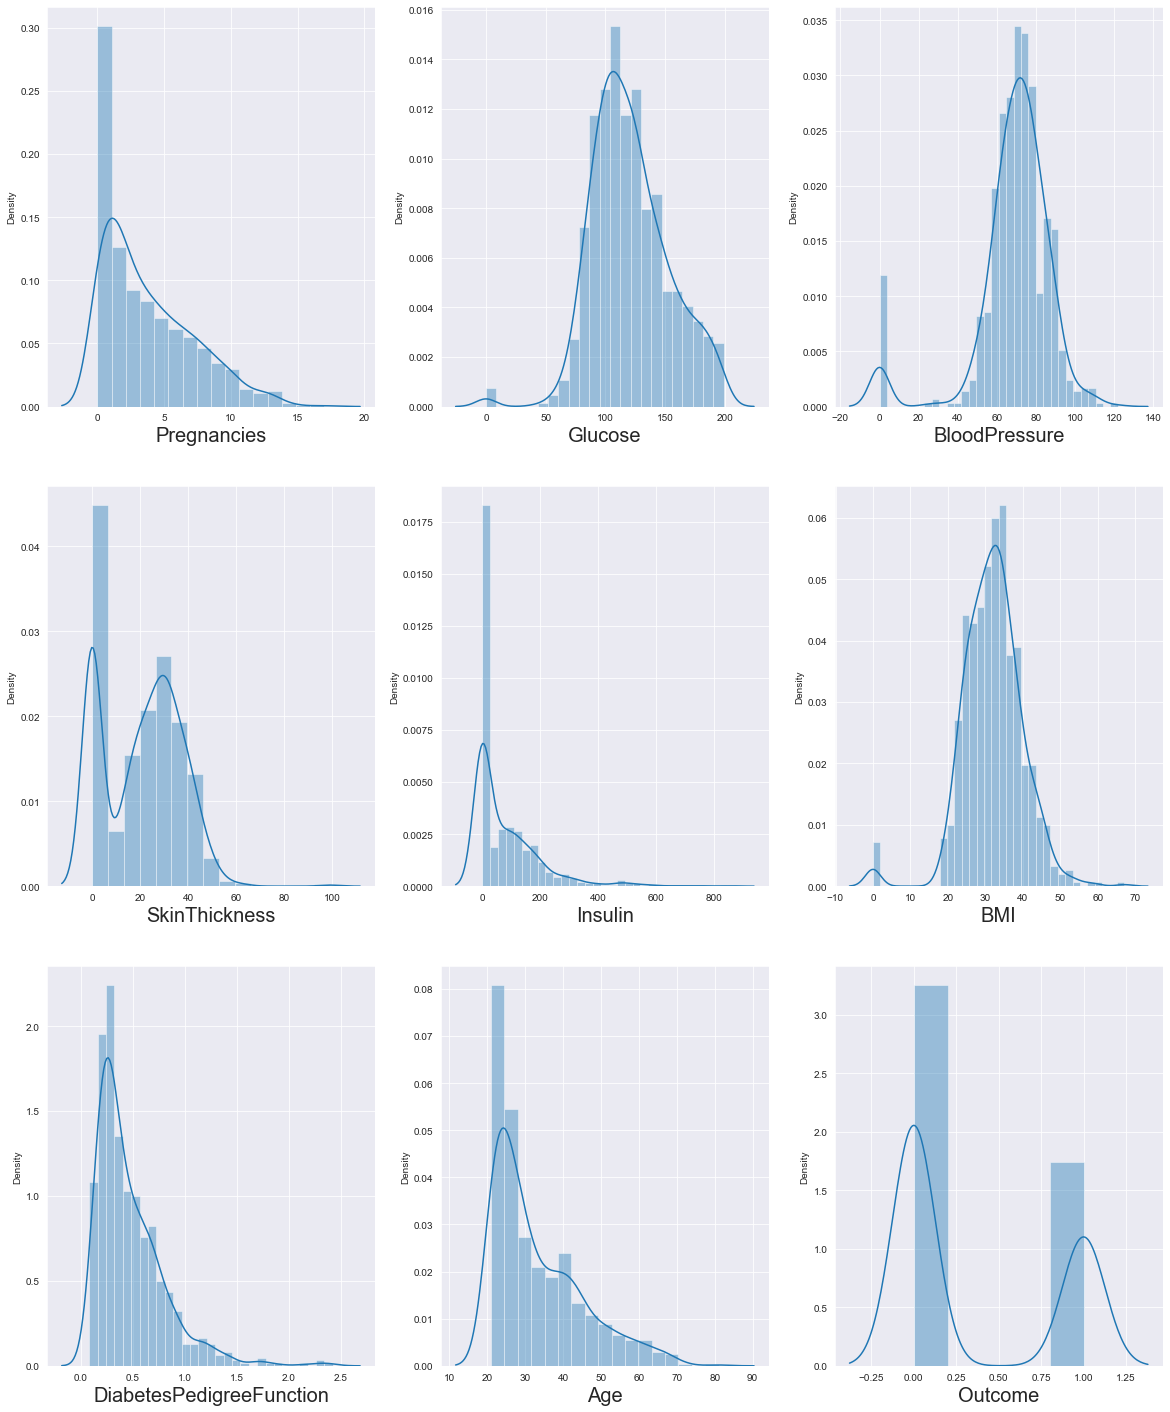

In [8]:
#Let's see the Distribution of our dataset
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for col in df:
    if plotnumber<=9:
        sns.set_style('darkgrid')
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.show()    

In [9]:
## Replacing the Zero Value
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].median())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin']=df['Insulin'].replace(0,80)
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.386719,26.606479,118.757812,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.096642,9.631241,93.039581,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,80.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,80.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


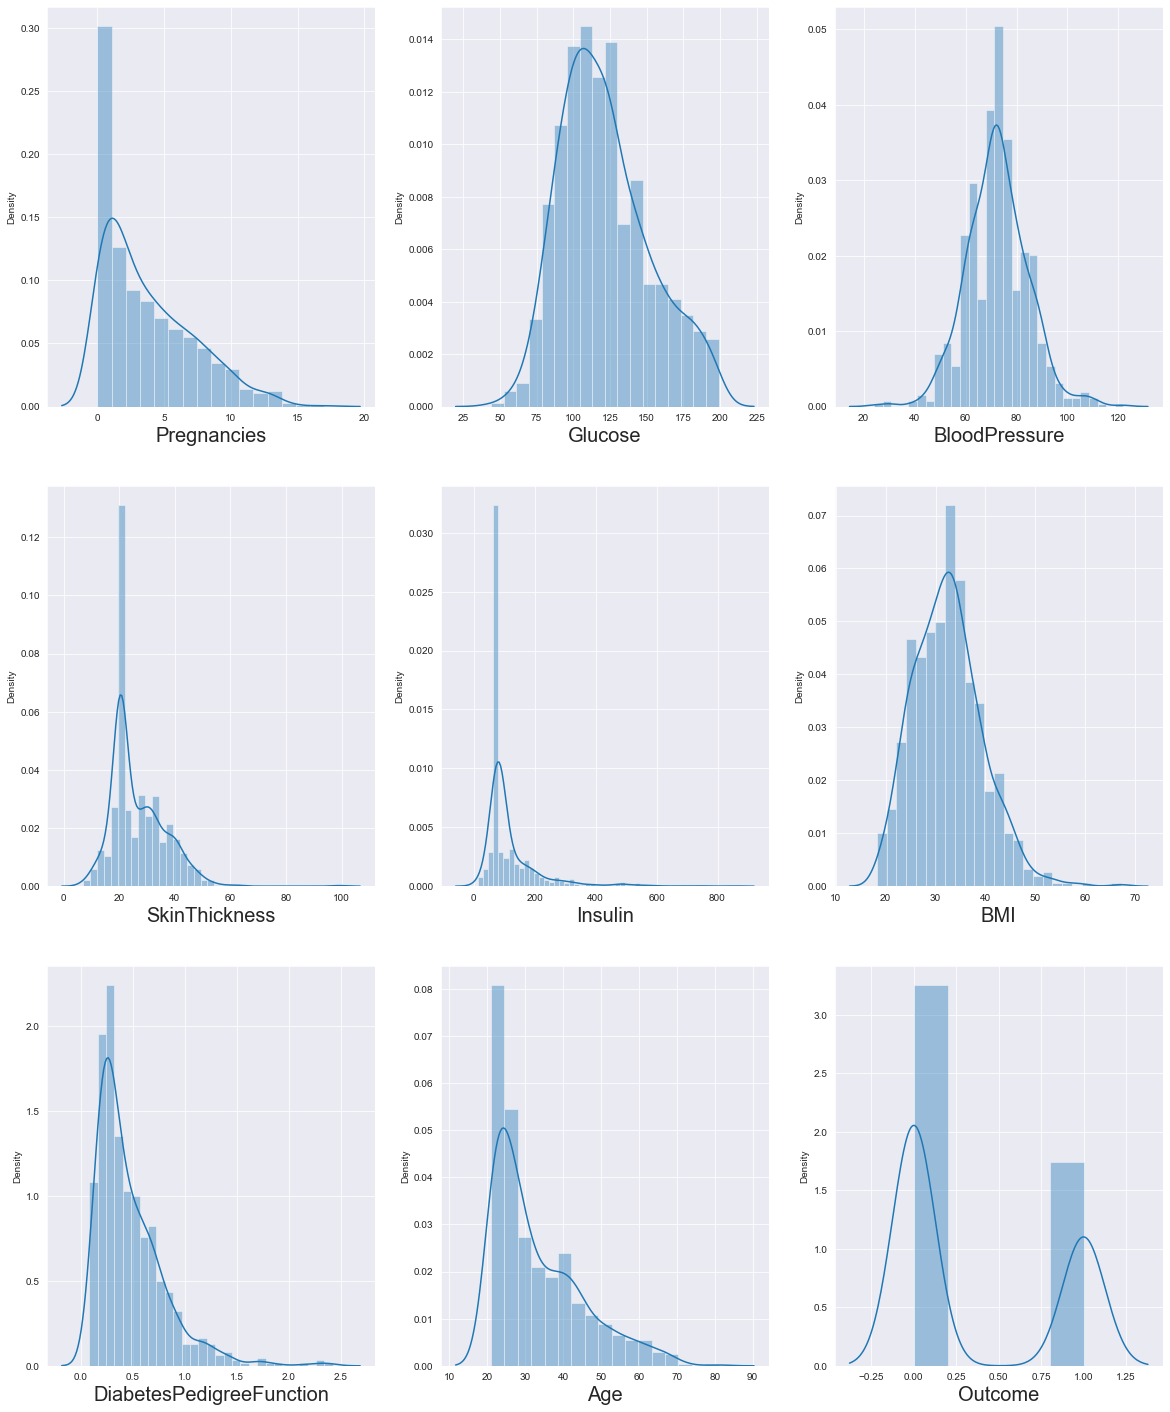

In [11]:
## After Imputing value
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=9:
        sns.set_style('darkgrid')
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()    

Now, we have dealt with Zero values, but there are outliers present in our dataset.

In [12]:
q=df['Pregnancies'].quantile(.98)
df_new=df[df['Pregnancies']<q]
#we are removing the pregnancies above 12, from pregnancies columns
s=df_new['SkinThickness'].quantile(.99)
df_new=df_new[df_new['SkinThickness']<s]
# we removed skinthickness above 51,means (99%) of data we consider.
i=df_new['Insulin'].quantile(.96)
df_new=df_new[df_new['Insulin']<i]
##we have taken 96 quantlie of insulin data
b=df_new['BMI'].quantile(.98)
df_new=df_new[df_new['BMI']<b]
## we remove top 2% data from our BMI columns
d=df_new['DiabetesPedigreeFunction'].quantile(.99)
df_new=df_new[df_new['DiabetesPedigreeFunction']<d]

a=df_new['Age'].quantile(.99)
df_new=df_new[df_new['Age']<a]

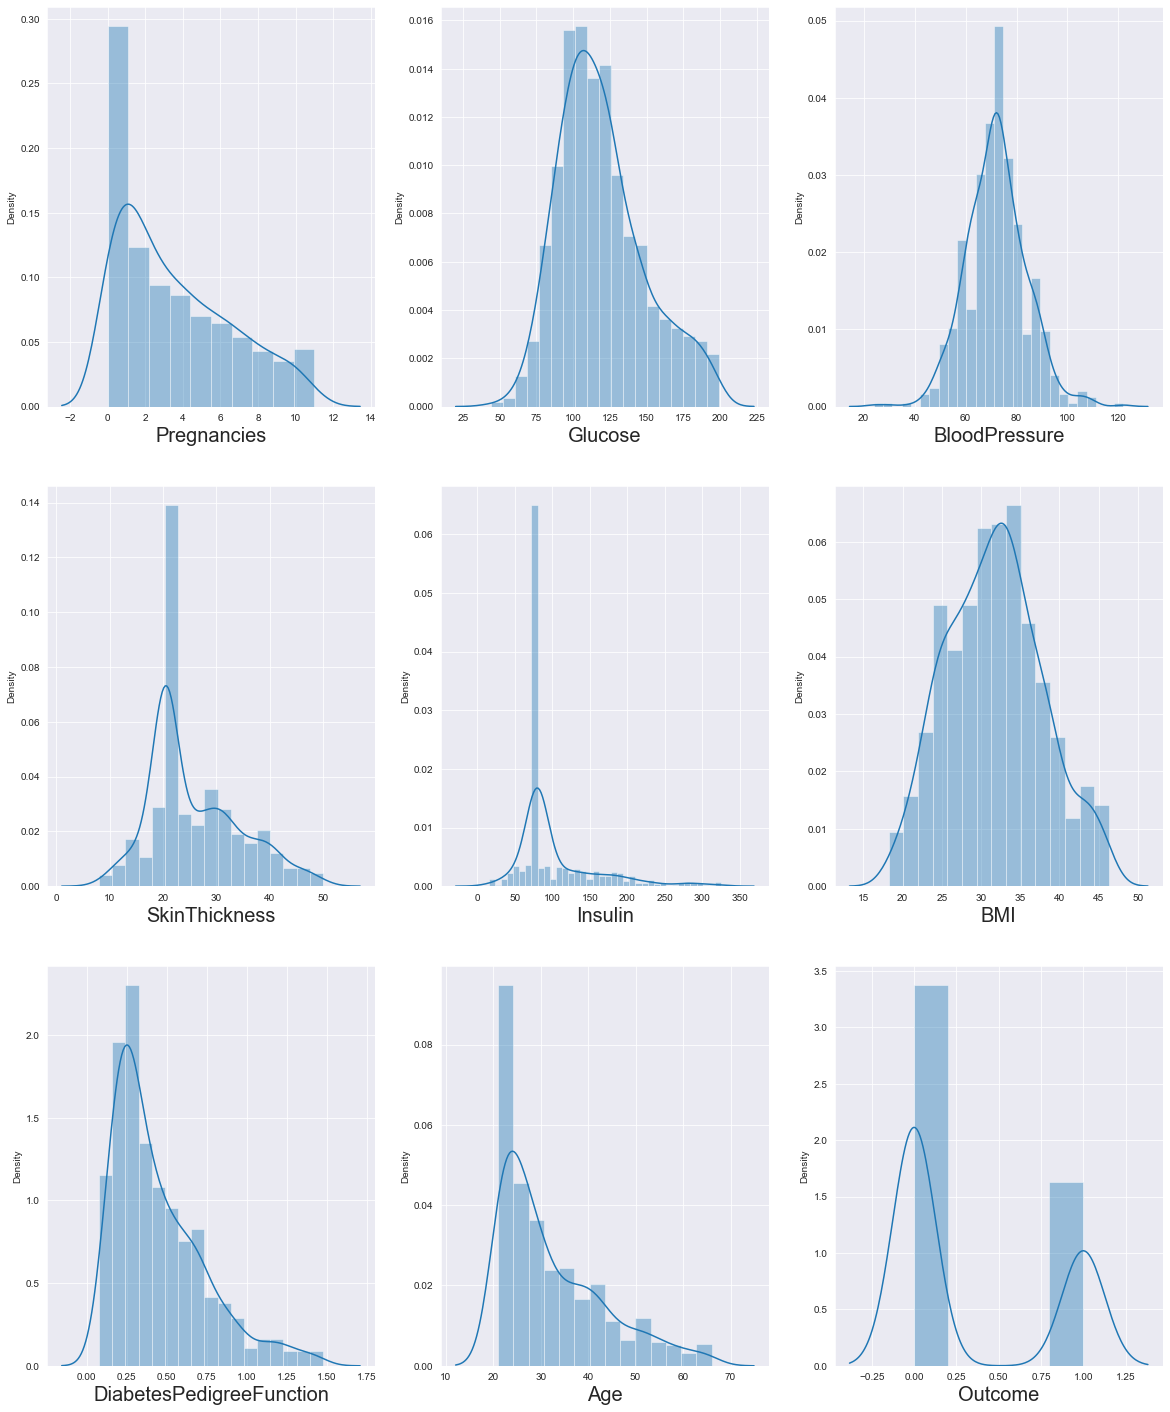

In [13]:
##
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for col in df_new:
    if plotnumber<=9:
        sns.set_style('darkgrid')
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df_new[col])
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.show()    

In [14]:
X=df_new.drop('Outcome',axis=1)
y=df_new['Outcome']

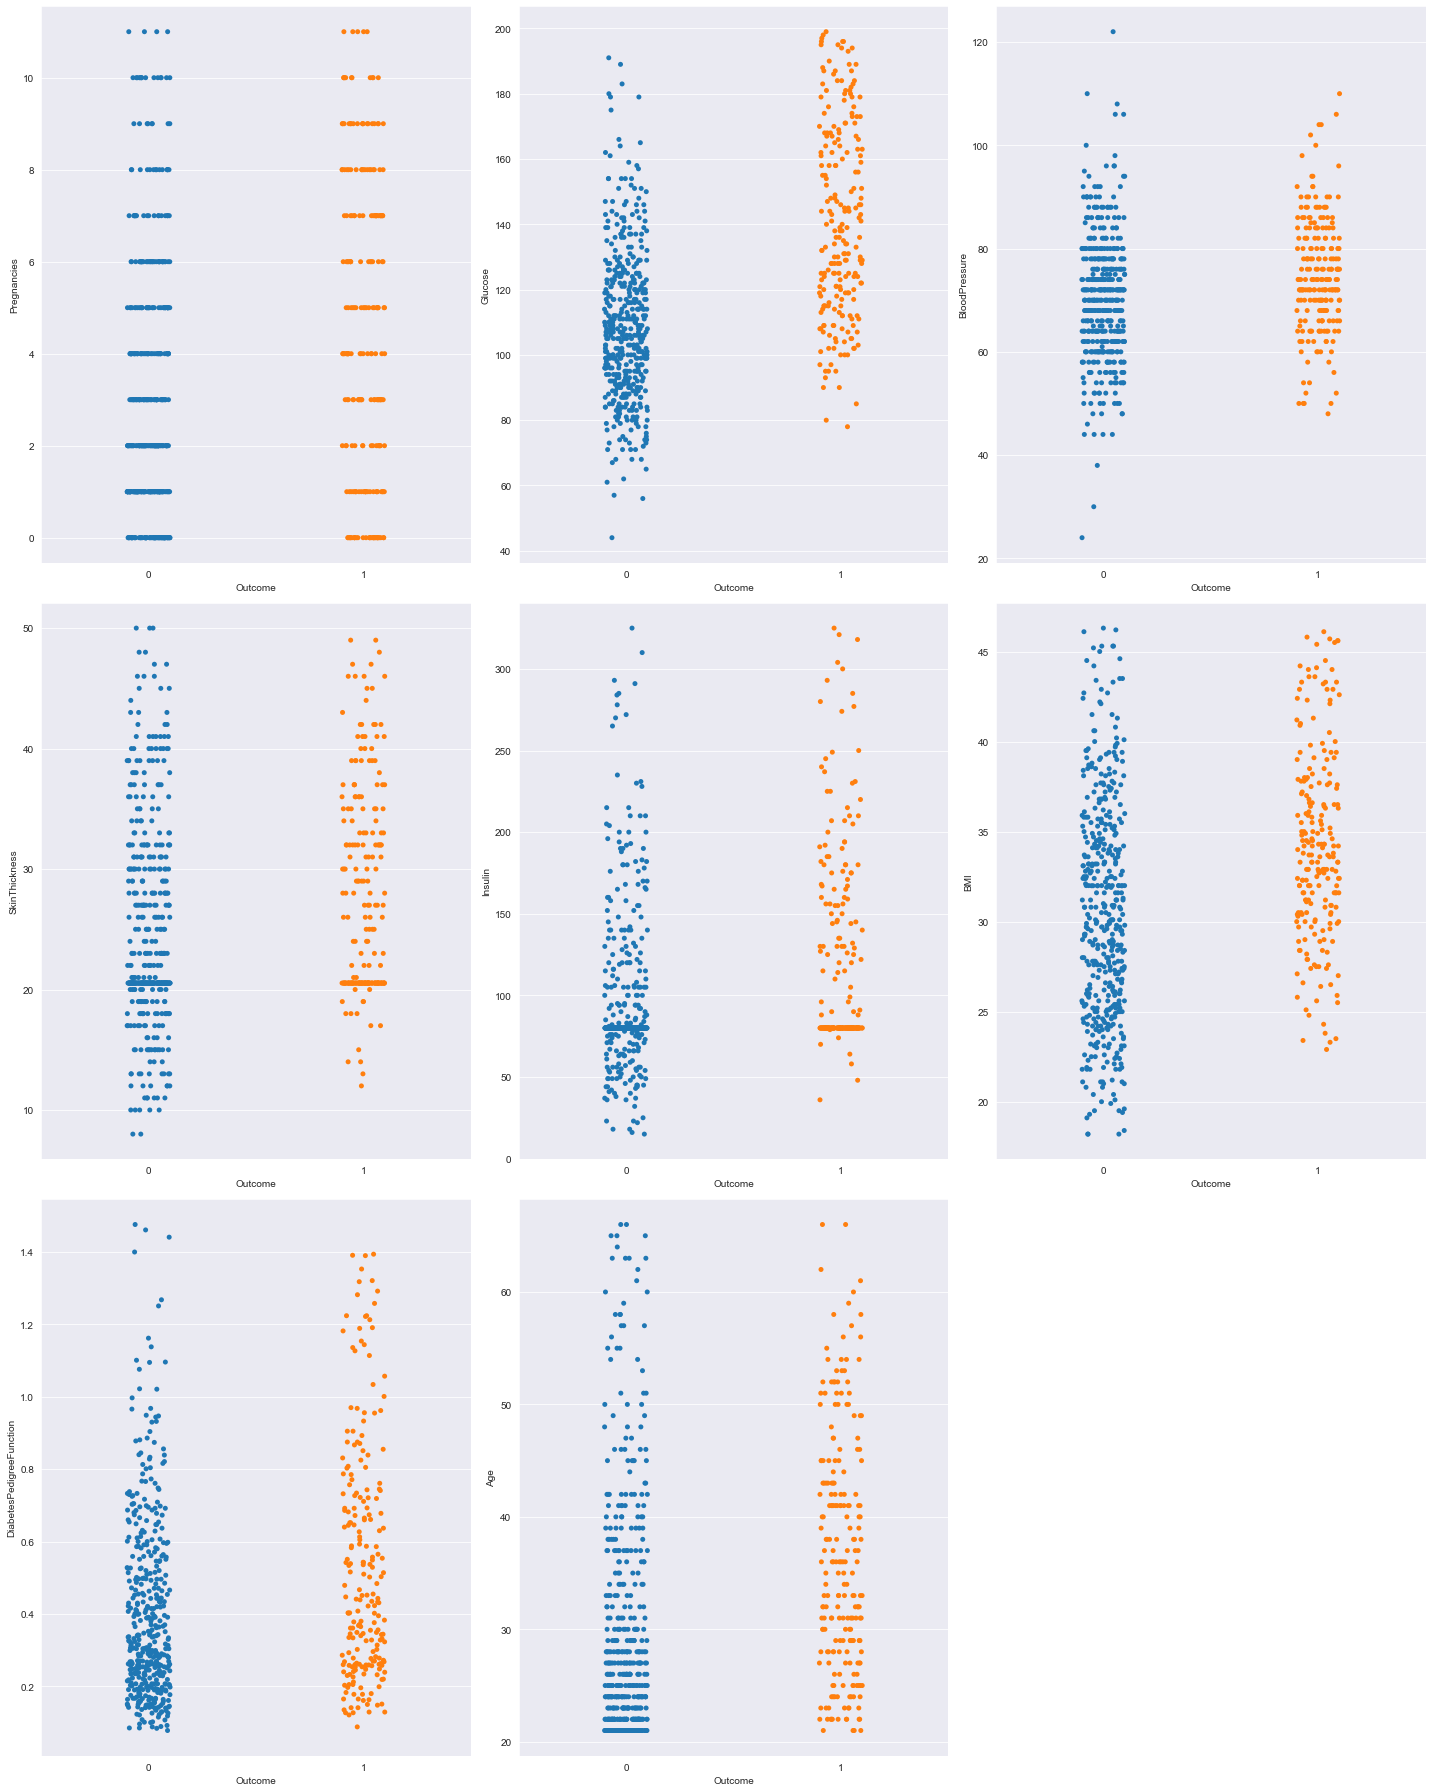

In [15]:
plt.figure(figsize=(20,25))
plot=1
for col in X:
    if plot<=8:
        ax=plt.subplot(3,3,plot)
        sns.stripplot(y,X[col])
    plot+=1
plt.tight_layout()    
    

<AxesSubplot:>

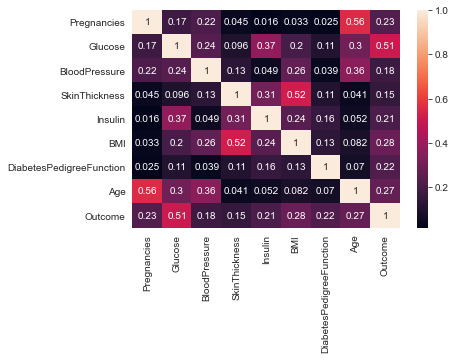

In [16]:
sns.heatmap(df_new.corr(),annot=True)

In [17]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X_scaled=scalar.fit_transform(X)

This is how  our data looks now after scaling,Now we will check for Multicollinearity using VIF(Variance Inflation Factor)

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [19]:
X_scaled

array([[ 0.80454507,  0.97660719, -0.00226243, ...,  0.30477839,
         0.62386717,  1.6115228 ],
       [-0.86890867, -1.1667971 , -0.51206221, ..., -0.84341798,
        -0.34212872, -0.12346453],
       [ 1.47392656,  2.16738735, -0.68199547, ..., -1.38471055,
         0.7813665 , -0.03214941],
       ...,
       [ 0.46985432,  0.05800535, -0.00226243, ..., -0.9090292 ,
        -0.71312715, -0.21477965],
       [-0.86890867,  0.22811681, -1.02186199, ..., -0.26931979,
        -0.34912869,  1.33757743],
       [-0.86890867, -0.89461877, -0.17219569, ..., -0.22011138,
        -0.46812819, -0.85398551]])

In [20]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['Features']=X.columns
vif

,vif,Features
0,1.461039,Pregnancies
1,1.327341,Glucose
2,1.247758,BloodPressure
3,1.461663,SkinThickness
4,1.303486,Insulin
5,1.496973,BMI
6,1.041348,DiabetesPedigreeFunction
7,1.675280,Age


All the VIF values are less than 5 and very low. That means no multicollinearity. Now, let's split the data

In [21]:
from sklearn.model_selection import train_test_split


In [22]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=.25,random_state=45)

# Model Building

In [23]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [24]:
lg.fit(x_train,y_train)

print(lg.score(x_train,y_train))

0.7988165680473372


In [25]:
lg.score(x_test,y_test)

0.757396449704142

In [26]:
lg_pred=lg.predict(x_test)

# Model_Evaluation

In [27]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve

In [28]:
print('accuracy_score:',accuracy_score(y_test,lg_pred))
print('Confusion_matrix:',confusion_matrix(y_test,lg_pred))
print('Classifiction Report:',classification_report(y_test,lg_pred))

accuracy_score: 0.757396449704142
Confusion_matrix: [[101  13]
 [ 28  27]]
Classifiction Report:               precision    recall  f1-score   support

           0       0.78      0.89      0.83       114
           1       0.68      0.49      0.57        55

    accuracy                           0.76       169
   macro avg       0.73      0.69      0.70       169
weighted avg       0.75      0.76      0.75       169



# Check Other Models 

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [30]:
model=[DecisionTreeClassifier(),KNeighborsClassifier(n_neighbors=15),SVC(),GaussianNB(),RandomForestClassifier()]

In [31]:
accuracy=[]
model_name=[]
for m in model:
    print(m)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('Accuracy Score',accuracy_score(y_test,pred))
    print('Confusion Matrix',confusion_matrix(y_test,pred))
    print('Classifiction report',classification_report(y_test,pred))
    accuracy.append(accuracy_score(y_test,pred))
    model_name.append(m)

DecisionTreeClassifier()
Accuracy Score 0.7100591715976331
Confusion Matrix [[86 28]
 [21 34]]
Classifiction report               precision    recall  f1-score   support

           0       0.80      0.75      0.78       114
           1       0.55      0.62      0.58        55

    accuracy                           0.71       169
   macro avg       0.68      0.69      0.68       169
weighted avg       0.72      0.71      0.71       169

KNeighborsClassifier(n_neighbors=15)
Accuracy Score 0.7692307692307693
Confusion Matrix [[102  12]
 [ 27  28]]
Classifiction report               precision    recall  f1-score   support

           0       0.79      0.89      0.84       114
           1       0.70      0.51      0.59        55

    accuracy                           0.77       169
   macro avg       0.75      0.70      0.71       169
weighted avg       0.76      0.77      0.76       169

SVC()
Accuracy Score 0.7692307692307693
Confusion Matrix [[104  10]
 [ 29  26]]
Classifiction repo

In [32]:
model_accuracy=pd.DataFrame(model_name,accuracy)

In [33]:
model_accuracy

,0
0.710059,DecisionTreeClassifier()
0.769231,KNeighborsClassifier(n_neighbors=15)
0.769231,SVC()
0.745562,GaussianNB()
0.804734,"(DecisionTreeClassifier(max_features='auto', r..."


In [35]:
pred_prob=lg.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,pred_prob)
fpr,tpr,thresholds

(array([0.        , 0.        , 0.        , 0.00877193, 0.00877193,
        0.01754386, 0.01754386, 0.03508772, 0.03508772, 0.05263158,
        0.05263158, 0.07894737, 0.07894737, 0.10526316, 0.10526316,
        0.11403509, 0.11403509, 0.12280702, 0.12280702, 0.15789474,
        0.15789474, 0.18421053, 0.18421053, 0.19298246, 0.19298246,
        0.20175439, 0.20175439, 0.21052632, 0.21052632, 0.24561404,
        0.24561404, 0.29824561, 0.29824561, 0.30701754, 0.30701754,
        0.33333333, 0.33333333, 0.34210526, 0.34210526, 0.35087719,
        0.35087719, 0.37719298, 0.37719298, 0.44736842, 0.44736842,
        0.45614035, 0.45614035, 0.5       , 0.5       , 0.51754386,
        0.51754386, 0.56140351, 0.56140351, 0.57894737, 0.57894737,
        0.62280702, 0.62280702, 0.71929825, 0.71929825, 1.        ]),
 array([0.        , 0.01818182, 0.16363636, 0.16363636, 0.23636364,
        0.23636364, 0.32727273, 0.32727273, 0.38181818, 0.38181818,
        0.43636364, 0.43636364, 0.45454545, 0.

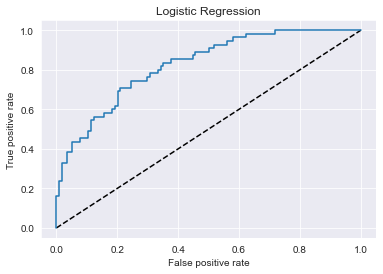

In [36]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()

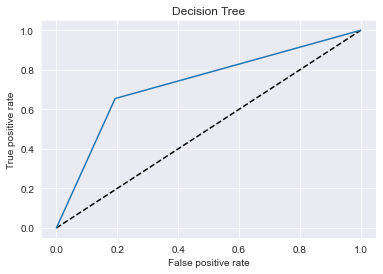

In [38]:
## Descision Tree
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred_prob=dt.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Decision Tree')
plt.show()

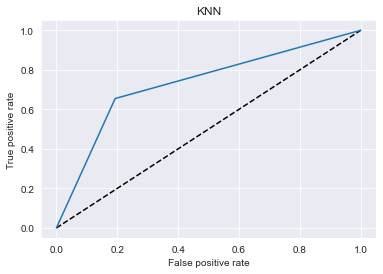

In [39]:
##KNN
kn=KNeighborsClassifier(n_neighbors=10)
kn.fit(x_train,y_train)
pred_prob=dt.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='KNN')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('KNN')
plt.show()

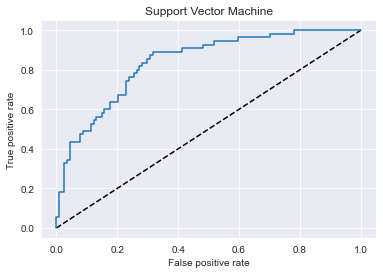

In [41]:
##SVC
svc=SVC(probability=True)
svc.fit(x_train,y_train)
pred_prob=svc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='SVC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Support Vector Machine')
plt.show()

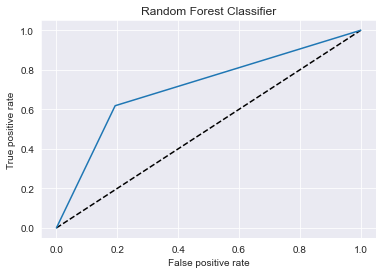

In [42]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred_prob=dt.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest Classifier')
plt.show()

# Cross validation 

In [44]:
from sklearn.model_selection import cross_val_score
cross_validation=cross_val_score(dt,x_train,y_train,cv=5)
print('Cross Validation of RF model',cross_validation)
print('Mean of cross_valid score',cross_validation.mean())
print('Standard deviation:',cross_validation.std())

Cross Validation of RF model [0.64705882 0.71568627 0.7029703  0.68316832 0.77227723]
Mean of cross_valid score 0.7042321879246749
Standard deviation: 0.04117133996107199


# Saving the Model

In [45]:
import pickle
file='diabetes_rf.pkl'
pickle.dump(dt,open(file,'wb'))